#DIGITS

Load the digits data

In [0]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

Fit and transform with a TSNE

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

Project the data in 2D

In [0]:
X_2d = tsne.fit_transform(X)

Visualize the data

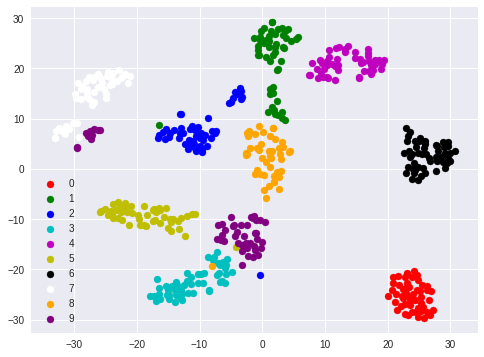

In [0]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

#OLIVETTI (photos de visages)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

In [0]:
olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

In [12]:
data.shape

(400, 4096)

In [0]:
# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props=dict(boxstyle='round', edgecolor='white')
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)

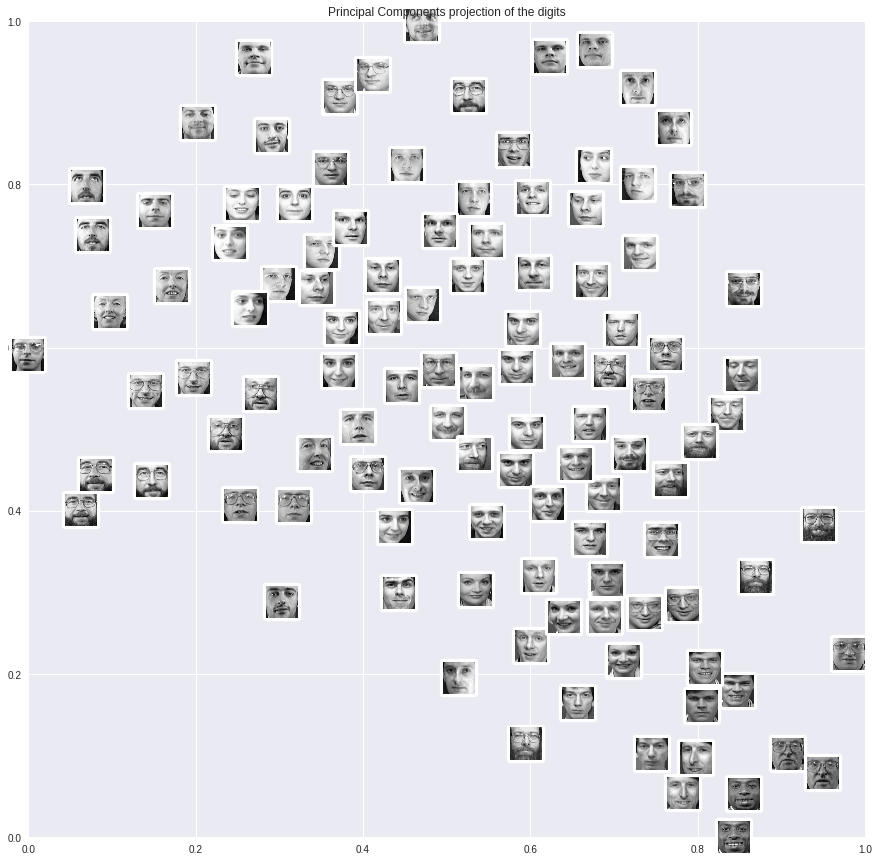

In [14]:
#Lancement du programme
X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000 ,init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()